In [1]:
import numpy as np
import pandas as pd 
import re
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, NMF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from string import punctuation
np.random.seed(42)
random.seed(42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VenEn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VenEn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VenEn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Question 1

In [2]:
news_df = pd.read_csv('Project1-Classification.csv')

In [3]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_text     3150 non-null   object
 1   summary       3150 non-null   object
 2   keywords      3150 non-null   object
 3   publish_date  1863 non-null   object
 4   authors       3150 non-null   object
 5   url           3150 non-null   object
 6   leaf_label    3150 non-null   object
 7   root_label    3150 non-null   object
dtypes: object(8)
memory usage: 197.0+ KB


In [4]:
news_df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [5]:
news_df.tail()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
3145,'By Rachel Premack of FreightWaves\n\nYou prob...,'Right now the barge industry — and all of us ...,"['coal', 'traffic', 'right', 'mississippi', 's...",NaN,['Tyler Durden'],https://www.zerohedge.com/markets/latest-suppl...,drought,climate
3146,'Manufacturing had a big summer. The CHIPS and...,'To address these issues and drive the transit...,"['manufacturing', 'system', 'future', 'technol...",NaN,['Mary Beth Gallagher'],https://news.mit.edu/2022/manufacturing-cleane...,drought,climate
3147,"'A golf cart on a path at Verrado, an 8,800-ac...",'Water flow has dropped precipitously in the C...,"['developers', 'live', 'state', 'development',...",NaN,['Keith Schneider'],https://news.yahoo.com/thousands-live-one-day-...,drought,climate
3148,"'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","['rohingyas', 'told', 'indonesia', 'refugees',...",NaN,['Online News Editor'],https://www.laprensalatina.com/dozens-of-rohin...,drought,climate
3149,'By Nora Buli\n\nOSLO (Reuters) – Norway’s dep...,'By Nora BuliOSLO (Reuters) – Norway’s deplete...,"['outlook', 'low', 'efforts', 'normal', 'level...",2022-10-26 00:00:00,['Syndicated Content'],https://katcountry989.com/2022/10/26/norways-p...,drought,climate


There are 3150 samples and 8 features

<BarContainer object of 3150 artists>

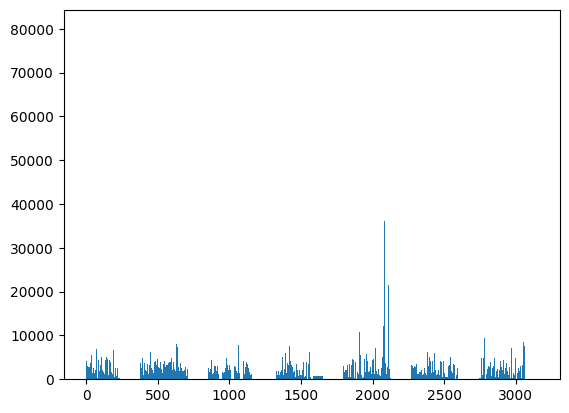

In [6]:
full_text_col = news_df['full_text']
full_text_AlphaNum = list()
for samp in full_text_col:
    match = re.sub(r'\W+', '', samp)
    full_text_AlphaNum.append(len(match))
plt.bar(np.arange(3150), np.array(full_text_AlphaNum), width=0.7)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '%22forest%20fire%22'),
  Text(1, 0, 'chess'),
  Text(2, 0, 'cricket'),
  Text(3, 0, 'drought'),
  Text(4, 0, 'earthquake'),
  Text(5, 0, 'flood'),
  Text(6, 0, 'football'),
  Text(7, 0, 'hockey'),
  Text(8, 0, 'soccer')])

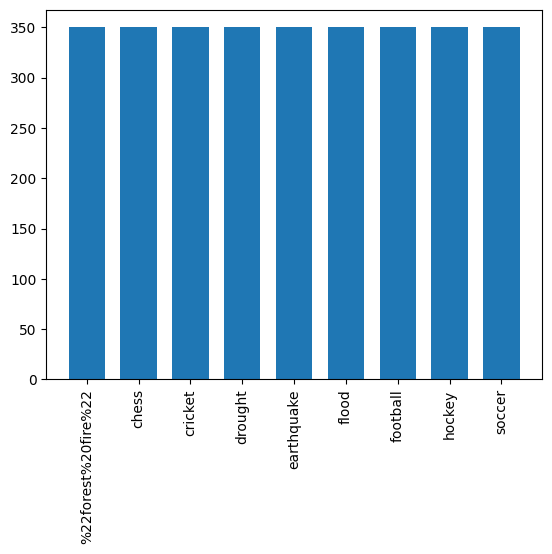

In [7]:
leaf_labels, leaf_indices = np.unique(news_df['leaf_label'], return_inverse=True)
plt.bar(leaf_labels, np.bincount(leaf_indices), width=0.7)
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'climate'), Text(1, 0, 'sports')])

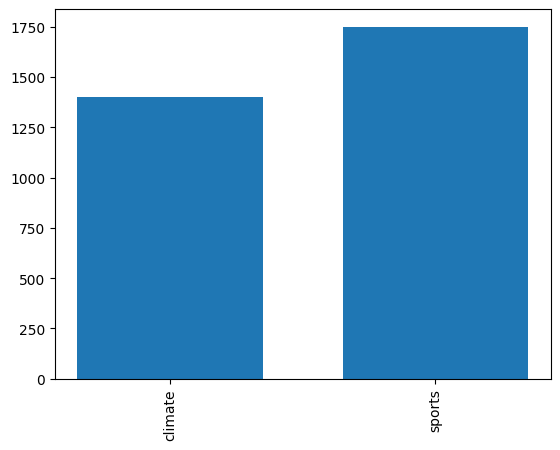

In [8]:
root_labels, root_indices = np.unique(news_df['root_label'], return_inverse=True)
plt.bar(root_labels, np.bincount(root_indices), width=0.7)
plt.xticks(rotation=90)

## Question 2

In [9]:
train_data, test_data = train_test_split(news_df[["full_text","root_label"]], test_size=0.2)

In [10]:
train_data.shape

(2520, 2)

In [11]:
test_data.shape

(630, 2)

## Question 3

In [12]:
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [13]:
lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatizer_func(sentence): 
    lemmatized_sen = []
    lemma_list = [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(clean(sentence)))]
    for lemma in lemma_list:
        lemmatized_sen.append(lemma)
    return ' '.join(lemmatized_sen)  

In [14]:
train_data_clean = []
test_data_clean = []
for sentence in train_data['full_text']:
    lemma = lemmatizer_func(sentence)
    train_data_clean.append(lemma)


In [15]:
for sentence in test_data['full_text']:
    lemma = lemmatizer_func(sentence)
    test_data_clean.append(lemma)

In [16]:
train_data_feat_vec = vectorizer.fit_transform(train_data_clean)
train_data_feat = tfidf_transformer.fit_transform(train_data_feat_vec)
test_data_feat_vec = vectorizer.transform(test_data_clean)
test_data_feat = tfidf_transformer.transform(test_data_feat_vec)

In [17]:
print(train_data_feat_vec.shape)
print(test_data_feat_vec.shape)
print(train_data_feat.shape)
print(test_data_feat.shape)

(2520, 14497)
(630, 14497)
(2520, 14497)
(630, 14497)


## Question 4

In [18]:
k_list = [1, 10, 50, 100, 200, 500, 1000, 2000]
k_explained_var = []
for k in k_list:
    svd = TruncatedSVD(n_components=k)
    train_data_LSI = svd.fit_transform(train_data_feat)
    k_explained_var.append(svd.explained_variance_ratio_.sum())
    print(f"Components = {k}, explainved var sum = { k_explained_var[-1]}")


Components = 1, explainved var sum = 0.006324455775679914
Components = 10, explainved var sum = 0.1537536794140638
Components = 50, explainved var sum = 0.31150250962739
Components = 100, explainved var sum = 0.3998856429976264
Components = 200, explainved var sum = 0.5106897480737156
Components = 500, explainved var sum = 0.7039434306889883
Components = 1000, explainved var sum = 0.8769270230695367
Components = 2000, explainved var sum = 0.9999898960302407


Text(0, 0.5, 'Explained Variance')

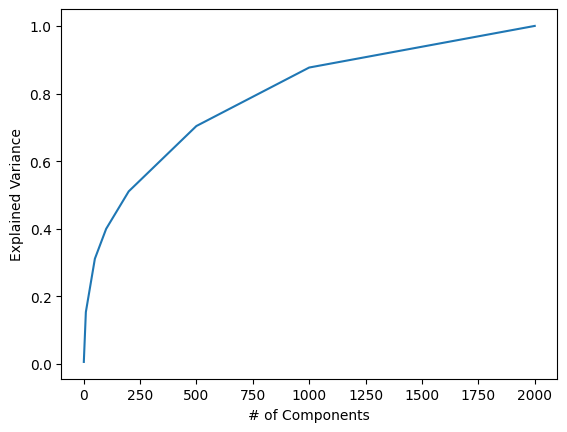

In [19]:
plt.plot(k_list,k_explained_var)
plt.xlabel('# of Components')
plt.ylabel('Explained Variance')

In [20]:
from sklearn.utils.extmath import randomized_svd
LSI = TruncatedSVD(n_components=50)


train_data_LSI = LSI.fit_transform(train_data_feat)
test_data_LSI = LSI.transform(test_data_feat)

u_train, s_train, v_t_train = randomized_svd(train_data_feat, n_components = 50)
s_train = np.diag(s_train)
u_test, s_test, v_t_test = randomized_svd(test_data_feat, n_components = 50)
s_test = np.diag(s_test)

LSI_train_err = np.sum(np.array(train_data_feat - (u_train.dot(s_train).dot(v_t_train)))**2)
LSI_test_err = np.sum(np.array(test_data_feat - (u_test.dot(s_test).dot(v_t_test)))**2)

print("LSI train error: ", LSI_train_err)
print("LSI test error: ", LSI_test_err)

LSI train error:  1677.668874608119
LSI test error:  400.0931144914344


In [21]:
nmf = NMF(n_components=50)

train_data_nmf = nmf.fit_transform(train_data_feat)
test_data_nmf = nmf.transform(test_data_feat)

nmf_train_err = np.sum(np.array(train_data_feat - train_data_nmf.dot(nmf.components_))**2)
nmf_test_err = np.sum(np.array(test_data_feat - test_data_nmf.dot(nmf.components_))**2)

print("NMF train error: ", nmf_train_err)
print("NMF test error: ", nmf_test_err)

NMF train error:  1702.846728894415
NMF test error:  452.0580949493943


## Question 5

In [22]:
from sklearn import svm
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, precision_score, f1_score, auc, confusion_matrix, ConfusionMatrixDisplay

In [23]:
y_train = []
y_test = []
for root in train_data['root_label']:
    if root == 'sports':
        y_train.append(1)
    else:
        y_train.append(0)
for root in test_data['root_label']:
    if root == 'sports':
        y_test.append(1)
    else:
        y_test.append(0)

In [24]:
hard_svm = svm.SVC(kernel='linear',C=1000)
hard_pred = hard_svm.fit(train_data_LSI, y_train).predict(test_data_LSI)

soft_svm = svm.SVC(kernel='linear',C=0.0001)
soft_pred = soft_svm.fit(train_data_LSI, y_train).predict(test_data_LSI)


Text(0, 0.5, 'True Positive Rate')

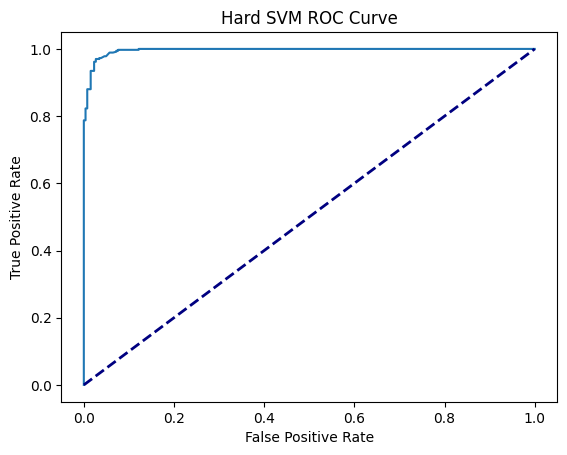

In [25]:
hard_fpr, hard_tpr, hard_roc_auc = dict(), dict(), dict()
hard_fpr, hard_tpr, _ = roc_curve(y_test, hard_svm.decision_function(test_data_LSI))
hard_roc_auc = auc(hard_fpr, hard_tpr)
plt.plot(hard_fpr, hard_tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Hard SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

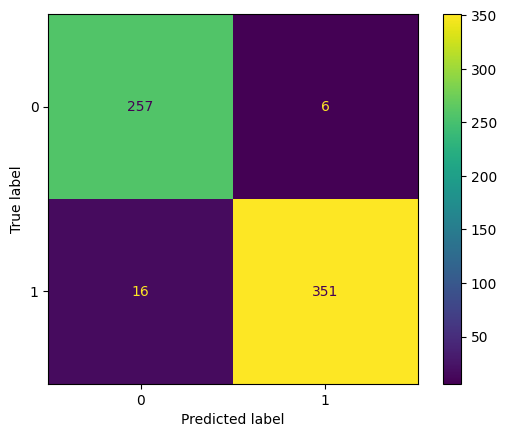

In [26]:
cm = confusion_matrix(y_test, hard_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [27]:
print("Hard SVM Accuracy: ", accuracy_score(y_test, hard_pred))
print("Hard SVM Recall: ", recall_score(y_test, hard_pred))
print("Hard SVM Precision: ", precision_score(y_test, hard_pred))
print("Hard SVM F1-Score: ", f1_score(y_test, hard_pred))

Hard SVM Accuracy:  0.9650793650793651
Hard SVM Recall:  0.9564032697547684
Hard SVM Precision:  0.9831932773109243
Hard SVM F1-Score:  0.9696132596685083


Text(0, 0.5, 'True Positive Rate')

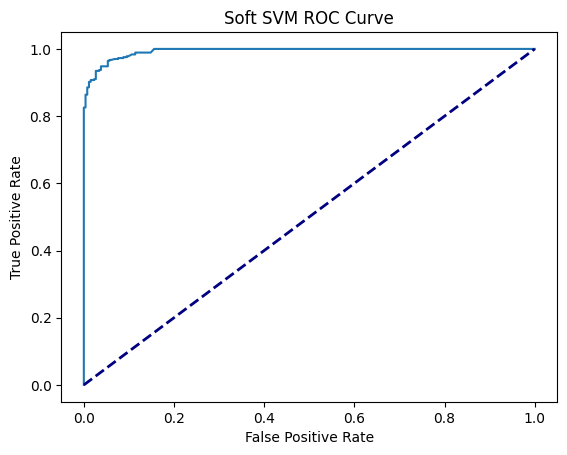

In [28]:
soft_fpr, soft_tpr, soft_roc_auc = dict(), dict(), dict()
soft_fpr, soft_tpr, _ = roc_curve(y_test, soft_svm.decision_function(test_data_LSI))
soft_roc_auc = auc(soft_fpr, soft_tpr)
plt.plot(soft_fpr, soft_tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Soft SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

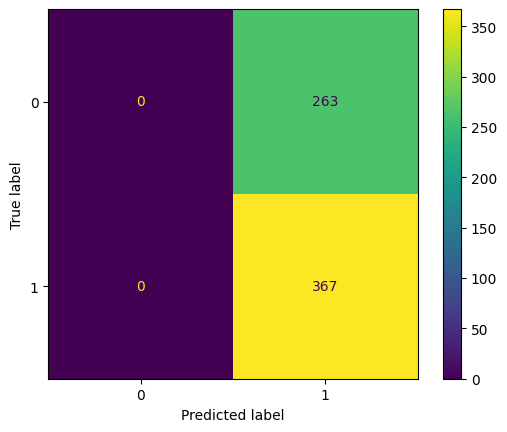

In [29]:
cm = confusion_matrix(y_test, soft_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [30]:
print("Soft SVM Accuracy: ", accuracy_score(y_test, soft_pred))
print("Soft SVM Recall: ", recall_score(y_test, soft_pred))
print("Soft SVM Precision: ", precision_score(y_test, soft_pred))
print("Soft SVM F1-Score: ", f1_score(y_test, soft_pred))

Soft SVM Accuracy:  0.5825396825396826
Soft SVM Recall:  1.0
Soft SVM Precision:  0.5825396825396826
Soft SVM F1-Score:  0.7362086258776329


In [32]:
from sklearn.model_selection import cross_val_score
best_gamma = 0
best_score = 0

gamma = [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]

for g in gamma:
    val_svm = svm.SVC(kernel='linear',C=g, random_state=42)
    scores = cross_val_score(val_svm, train_data_LSI, y_train, cv=5)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_gamma = g
print(f"Best Gamma: {best_gamma}, with an avg score: {best_score}")

    

Best Gamma: 100, with an avg score: 0.9527777777777777


SVM Accuracy:  0.9634920634920635
SVM Recall:  0.9536784741144414
SVM Precision:  0.9831460674157303
SVM F1-Score:  0.9681881051175657


Text(0, 0.5, 'True Positive Rate')

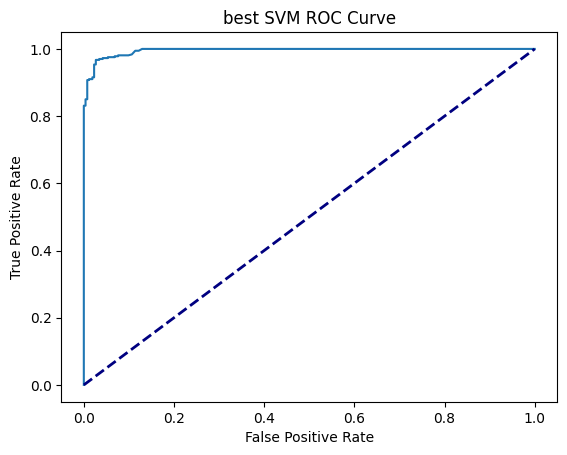

In [33]:
best_svm = svm.SVC(kernel='linear',C=10)
best_pred = best_svm.fit(train_data_LSI, y_train).predict(test_data_LSI)
print("SVM Accuracy: ", accuracy_score(y_test, best_pred))
print("SVM Recall: ", recall_score(y_test, best_pred))
print("SVM Precision: ", precision_score(y_test, best_pred))
print("SVM F1-Score: ", f1_score(y_test, best_pred))

best_fpr, best_tpr, best_roc_auc = dict(), dict(), dict()
best_fpr, best_tpr, _ = roc_curve(y_test, best_svm.decision_function(test_data_LSI))
best_roc_auc = auc(best_fpr, best_tpr)
plt.plot(best_fpr, best_tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('best SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

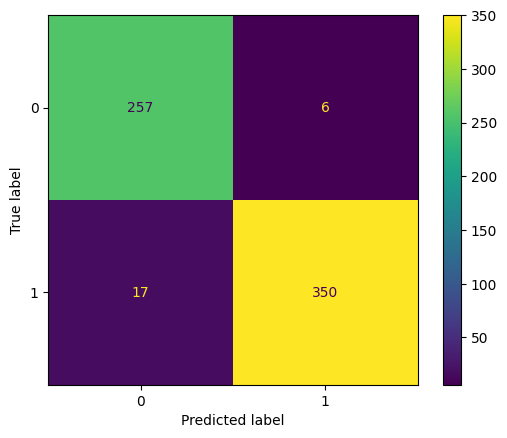

In [34]:
cm = confusion_matrix(y_test, best_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

## Question 6

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1000, penalty = 'none', random_state=42,max_iter=100000) # no regulation
log_reg_pred = log_reg.fit(train_data_LSI,y_train).predict(test_data_LSI)

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Text(0, 0.5, 'True Positive Rate')

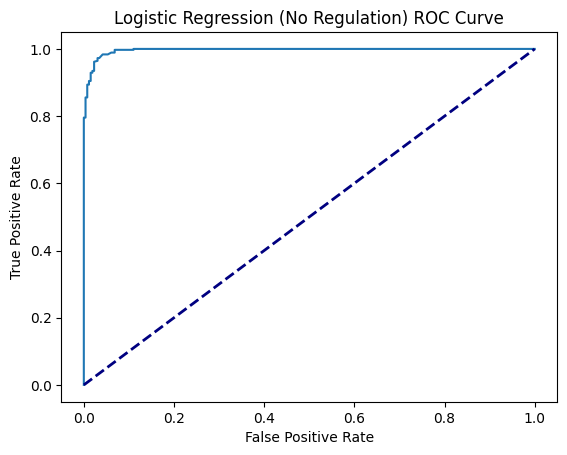

In [36]:
log_reg_fpr, log_reg_tpr, log_reg_roc_auc = dict(), dict(), dict()
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg.decision_function(test_data_LSI))
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
plt.plot(log_reg_fpr, log_reg_tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Logistic Regression (No Regulation) ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

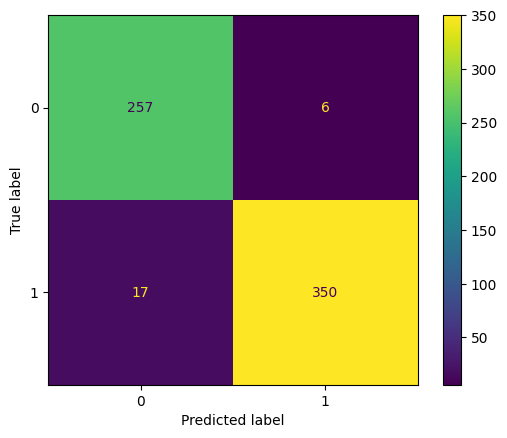

In [37]:
cm = confusion_matrix(y_test, log_reg_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [38]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Recall: ", recall_score(y_test, log_reg_pred))
print("Logisitic Regression Precision: ", precision_score(y_test, log_reg_pred))
print("Logistic Regression F1-Score: ", f1_score(y_test, log_reg_pred))

Logistic Regression Accuracy:  0.9634920634920635
Logistic Regression Recall:  0.9536784741144414
Logisitic Regression Precision:  0.9831460674157303
Logistic Regression F1-Score:  0.9681881051175657


In [39]:
log_reg_gamma = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]

best_log_reg_l1_score = 0
best_log_reg_l1_gamma = 0

for g in log_reg_gamma:
    log_reg_l1 = LogisticRegression(C=g, penalty = 'l1', solver = 'liblinear', random_state=42,max_iter=100000)
    scores = cross_val_score(log_reg_l1, train_data_LSI, y_train, cv=5)
    if scores.mean() > best_log_reg_l1_score:
        best_log_reg_l1_score = scores.mean()
        best_log_reg_l1_gamma = g

print(f"For Log Regression (L1) -> Best Gamma: {best_gamma}, with an avg score: {best_score}")

For Log Regression (L1) -> Best Gamma: 100, with an avg score: 0.9527777777777777


In [40]:
best_log_reg_l2_score = 0
best_log_reg_l2_gamma = 0

for g in log_reg_gamma:
    log_reg_l2 = LogisticRegression(C=g, penalty = 'l2', random_state=42,max_iter=100000)
    scores = cross_val_score(log_reg_l2, train_data_LSI, y_train, cv=5)
    if scores.mean() > best_log_reg_l2_score:
        best_log_reg_l2_score = scores.mean()
        best_log_reg_l2_gamma = g

print(f"For Log Regression (L2) -> Best Gamma: {best_gamma}, with an avg score: {best_score}")

For Log Regression (L2) -> Best Gamma: 100, with an avg score: 0.9527777777777777


In [41]:
best_log_reg = LogisticRegression(C=g, penalty = 'none', random_state=42,max_iter=100000)
best_log_reg_l1 = LogisticRegression(C=10, penalty = 'l1', solver = 'liblinear', random_state=42,max_iter=100000)
best_log_reg_l2 = LogisticRegression(C=10, penalty = 'l2', random_state=42,max_iter=100000)

best_log_reg_pred = best_log_reg.fit(train_data_LSI, y_train).predict(test_data_LSI)
best_l1_pred = best_log_reg_l1.fit(train_data_LSI, y_train).predict(test_data_LSI)
best_l2_pred = best_log_reg_l2.fit(train_data_LSI, y_train).predict(test_data_LSI)

print("Log Reg (No Regulation) Accuracy: ", accuracy_score(y_test, best_log_reg_pred))
print("Log Reg (No Regulation): ", recall_score(y_test, best_log_reg_pred))
print("Log Reg (No Regulation): ", precision_score(y_test, best_log_reg_pred))
print("Log Reg (No Regulation): ", f1_score(y_test, best_log_reg_pred))

print("Log Reg (L1) Accuracy: ", accuracy_score(y_test, best_l1_pred))
print("Log Reg (L1): ", recall_score(y_test, best_l1_pred))
print("Log Reg (L1): ", precision_score(y_test, best_l1_pred))
print("Log Reg (L1): ", f1_score(y_test, best_l1_pred))

print("Log Reg (L2) Accuracy: ", accuracy_score(y_test, best_l2_pred))
print("Log Reg (L2): ", recall_score(y_test, best_l2_pred))
print("Log Reg (L2): ", precision_score(y_test, best_l2_pred))
print("Log Reg (L2): ", f1_score(y_test, best_l2_pred))

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Log Reg (No Regulation) Accuracy:  0.9634920634920635
Log Reg (No Regulation):  0.9536784741144414
Log Reg (No Regulation):  0.9831460674157303
Log Reg (No Regulation):  0.9681881051175657
Log Reg (L1) Accuracy:  0.9698412698412698
Log Reg (L1):  0.9618528610354223
Log Reg (L1):  0.9860335195530726
Log Reg (L1):  0.9737931034482759
Log Reg (L2) Accuracy:  0.9650793650793651
Log Reg (L2):  0.9591280653950953
Log Reg (L2):  0.9805013927576601
Log Reg (L2):  0.9696969696969696


## Question 7

Gaussian NB Accuracy:  0.9396825396825397
Gaussian NB Recall:  0.9046321525885559
Gaussian NB Precision:  0.991044776119403
Gaussian NB F1-Score:  0.945868945868946


Text(0, 0.5, 'True Positive Rate')

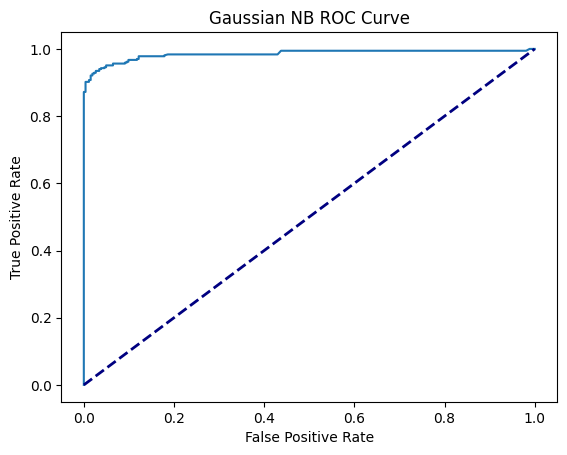

In [42]:
from sklearn.naive_bayes import GaussianNB

gaussNB = GaussianNB()
gaussNB_pred = gaussNB.fit(train_data_LSI, y_train).predict(test_data_LSI)

print("Gaussian NB Accuracy: ", accuracy_score(y_test, gaussNB_pred))
print("Gaussian NB Recall: ", recall_score(y_test, gaussNB_pred))
print("Gaussian NB Precision: ", precision_score(y_test, gaussNB_pred))
print("Gaussian NB F1-Score: ", f1_score(y_test, gaussNB_pred))

gnb_fpr, gnb_tpr, gnb_roc_auc = dict(), dict(), dict()
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gaussNB.predict_proba(test_data_LSI)[:,1])
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)
plt.plot(gnb_fpr, gnb_tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Gaussian NB ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

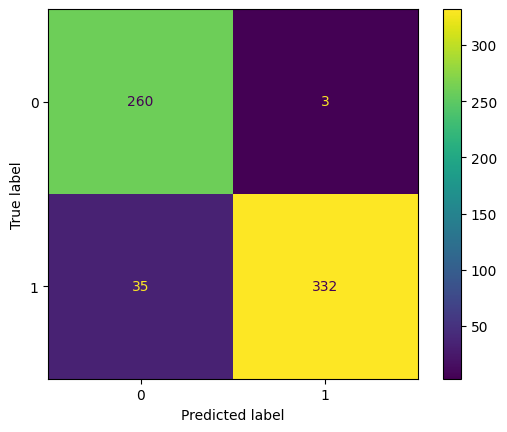

In [43]:
cm = confusion_matrix(y_test, gaussNB_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

## Question 8

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from joblib import Memory
from tempfile import mkdtemp

In [45]:
def stemming_func(sentence):
    stemmed_sen = []
    stem_list = word_tokenize(sentence)
    for stem in stem_list:
        stemmed_sen.append(clean(stem))  
    return stemmed_sen

In [113]:
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', None),
    ('clf', None),
],
memory=memory
)
param_grid = [
    {
        'vect__min_df': (3,5),
        'vect__analyzer': (lemmatizer_func,stemming_func),
        'reduce_dim': (TruncatedSVD(n_components=5, random_state=42),
                       TruncatedSVD(n_components=30, random_state=42),
                       TruncatedSVD(n_components=80, random_state=42),
                       NMF(n_components=5, init='random', random_state=42),
                       NMF(n_components=30, init='random', random_state=42),
                       NMF(n_components=80, init='random', random_state=42)
                       ), 
        'clf': (svm.SVC(kernel='linear',C=10,random_state=42),
                GaussianNB(),
                LogisticRegression(C=10,penalty='l1',random_state=42,solver='liblinear',max_iter=100000),
                LogisticRegression(C=10,penalty='l2',random_state=42,solver='liblinear',max_iter=100000),
                ),  
    }
]

In [114]:
grid_search = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')
grid_search.fit(train_data['full_text'], y_train)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatizer_func at 0x000001C992F57A60>,
                min_df=3, stop_words='english'), 
303     'By: News On 6\n\n-\n\nEach year, The Salvatio...
1951    '59% of homeowners believe wildfire poses a “m...
664     'Joining us on New Tricks this week is Carl We...
1813    'For more crisp and insightful business and ec...
1623    'A listener wrote into Bobby Bones mailbag say...
                              ...                        
3092    'Some Coachella Valley homeowners and communit...
1095    'About Photo #4851709: Gerard Pique retired fr...
1130    'How much of your donated clothing finds a new...
1294    'The Tennessee State football team fell out of...
860     'Wilmington StarNews\n\nThis feature is sponso...
Name: full_text, Length: 2016, dtype: object, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 269.1s, 4.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x67 sparse matrix of type '<class 'numpy.int64'>'
	with 81528 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 275.4s, 4.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x66 sparse matrix of type '<class 'numpy.int64'>'
	with 81452 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 271.1s, 4.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x67 sparse matrix of type '<class 'numpy.int64'>'
	with 81448 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 277.7s, 4.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x66 sparse matrix of type '<class 'numpy.int64'>'
	with 81722 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 266.2s, 4.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x65 sparse matrix of type '<class 'numpy.int64'>'
	with 81458 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 264.3s, 4.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x66 sparse matrix of type '<class 'numpy.int64'>'
	with 81525 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 261.5s, 4.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x65 sparse matrix of type '<class 'numpy.int64'>'
	with 81449 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 264.9s, 4.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x66 sparse matrix of type '<class 'numpy.int64'>'
	with 81445 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 132.6s, 2.2min
[Memory]132.9s, 2.2min  : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]132.9s, 2.2min  : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47f4b419676a3d021c565c65cd6ac98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function lemmatizer_func at 0x000001C992F57A60>,
                min_df=5, stop_words='english'), 
2310    'As of Sunday night, a lopsided area of low pr...
2189    'The U.N. children’s agency says some 2 millio...


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 80.4s, 1.3min
[Memory]80.5s, 1.3min   : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]80.6s, 1.3min   : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\46814819040a3d207515a37a17547a20
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming_func at 0x000001C9A6563B80>,
                min_df=3, stop_words='english'), 
303     'By: News On 6\n\n-\n\nEach year, The Salvatio...
1951    '59% of homeowners believe wildfire poses a “m...
66

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.9s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x19423 sparse matrix of type '<class 'numpy.int64'>'
	with 504238 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.5s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x19104 sparse matrix of type '<class 'numpy.int64'>'
	with 500019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.6s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x19034 sparse matrix of type '<class 'numpy.int64'>'
	with 496738 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\pipeline.py:360: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 32.6s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x19644 sparse matrix of type '<class 'numpy.int64'>'
	with 506990 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 34.6s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x19527 sparse matrix of type '<class 'numpy.int64'>'
	with 496927 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.5s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x13095 sparse matrix of type '<class 'numpy.int64'>'
	with 482988 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 31.8s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x12508 sparse matrix of type '<class 'numpy.int64'>'
	with 477447 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 33.8s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x12895 sparse matrix of type '<class 'numpy.int64'>'
	with 476019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


_______________________________________________fit_transform_one - 32.2s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x13114 sparse matrix of type '<class 'numpy.int64'>'
	with 485002 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


______________________________________________fit_transform_one - 211.2s, 3.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x12462 sparse matrix of type '<class 'numpy.int64'>'
	with 473267 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81452 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x67 sparse matrix of type '<class 'numpy.float64'>'
	with 81448 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81722 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81458 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81525 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.1s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81449 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81445 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\0097641b0375a6b511d4717c01e667a0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_tra

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.3s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81452 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.4s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x67 sparse matrix of type '<class 'numpy.float64'>'
	with 81448 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.4s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81722 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.6s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81458 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.4s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81525 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.3s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81449 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.3s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81445 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 1.4s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\de0337444e554f649500eaf9f9ad8ada
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_tra

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 14.0s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47745c57042120bfd82151ba8b13be6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\acce169a748ba3a22acd7afd3ab5c369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x19104 sparse matrix of type '<class 'numpy.float64'>'
	with 500019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 13.4s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\e8c29329059b418c6bf5e32f70d6985f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\bab71e132cec8540658e845bcfc37618
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x19034 sparse matrix of type '<class 'numpy.float64'>'
	with 496738 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 13.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\ba0da366fbf2993916061f69b4dc3fe6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\980b218a497ebb4836c90d4adfc18c0f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x19644 sparse matrix of type '<class 'numpy.float64'>'
	with 506990 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 14.3s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e3e6bfa9d4a437a2b3cccbdac54bbbf
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\67fcd8cc2000cbd1828b37f35539538a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x19527 sparse matrix of type '<class 'numpy.float64'>'
	with 496927 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 13.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\1b8b7e1314fcc7fdc92ae05fa17b28f1
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\898624a33a5be3b355402ac235e08b57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x13095 sparse matrix of type '<class 'numpy.float64'>'
	with 482988 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.6s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\62b79faef20b694a53391269633bffea
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\56fca8b07fa25a20511dcff65c2c151a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x12508 sparse matrix of type '<class 'numpy.float64'>'
	with 477447 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.4s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\0aadd95dd89a49733d0b3fbaebb9695d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a413209385c26354e5846f88086b0e14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x12895 sparse matrix of type '<class 'numpy.float64'>'
	with 476019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b2cd0556f9ee476edc2e31188126a6a7
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\c14cd772078bdb5790e569769856becb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x13114 sparse matrix of type '<class 'numpy.float64'>'
	with 485002 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\22d3368401d60b82b73118502c3bec11
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\09068c72bad92538acce6ed722aa888d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x12462 sparse matrix of type '<class 'numpy.float64'>'
	with 473267 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 10.3s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b4f4766074c9644944564e980f17ad34
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\72bc4fcafb466725334e15e387ea18ce
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x67 sparse matrix of type '<class 'numpy.float64'>'
	with 81528 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.3s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81452 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.5s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x67 sparse matrix of type '<class 'numpy.float64'>'
	with 81448 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 6.2s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81722 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 7.5s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81458 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.4s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81525 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.5s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x65 sparse matrix of type '<class 'numpy.float64'>'
	with 81449 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.6s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x66 sparse matrix of type '<class 'numpy.float64'>'
	with 81445 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 5.5s, 0.1min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\2062f80ce5cce96102b614f3e27ea5bd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\411163adc7c9309c0a397de91e33eabd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e4894cf2d076896e2736f887df0abb3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x19423 sparse matrix of type '<class 'numpy.float64'>'
	with 504238 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 73.3s, 1.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47745c57042120bfd82151ba8b13be6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\acce169a748ba3a22acd7afd3ab5c369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x19104 sparse matrix of type '<class 'numpy.float64'>'
	with 500019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 70.1s, 1.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\e8c29329059b418c6bf5e32f70d6985f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\bab71e132cec8540658e845bcfc37618
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x19034 sparse matrix of type '<class 'numpy.float64'>'
	with 496738 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 70.0s, 1.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\ba0da366fbf2993916061f69b4dc3fe6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\980b218a497ebb4836c90d4adfc18c0f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x19644 sparse matrix of type '<class 'numpy.float64'>'
	with 506990 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 70.6s, 1.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e3e6bfa9d4a437a2b3cccbdac54bbbf
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\67fcd8cc2000cbd1828b37f35539538a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x19527 sparse matrix of type '<class 'numpy.float64'>'
	with 496927 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 71.2s, 1.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\1b8b7e1314fcc7fdc92ae05fa17b28f1
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\898624a33a5be3b355402ac235e08b57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x13095 sparse matrix of type '<class 'numpy.float64'>'
	with 482988 stored elements in Compressed Sparse Row format>, 
[ 1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_____________________________________________fit_transform_one - 865.6s, 14.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\62b79faef20b694a53391269633bffea
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\56fca8b07fa25a20511dcff65c2c151a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12508 sparse matrix of type '<class 'numpy.float64'>'
	with 477447 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 46.4s, 0.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\0aadd95dd89a49733d0b3fbaebb9695d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a413209385c26354e5846f88086b0e14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12895 sparse matrix of type '<class 'numpy.float64'>'
	with 476019 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 48.2s, 0.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b2cd0556f9ee476edc2e31188126a6a7
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\c14cd772078bdb5790e569769856becb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x13114 sparse matrix of type '<class 'numpy.float64'>'
	with 485002 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 49.2s, 0.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\22d3368401d60b82b73118502c3bec11
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\09068c72bad92538acce6ed722aa888d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12462 sparse matrix of type '<class 'numpy.float64'>'
	with 473267 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 46.6s, 0.8min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b4f4766074c9644944564e980f17ad34
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\72bc4fcafb466725334e15e387ea18ce
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9153613ec19638af601b70b35f28039e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_tra

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b4c1f4e756de1ce744776257175cda4c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\de0337444e554f649500eaf9f9ad8ada
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\76fd7aa1693be7cffd4edc67772f2720
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\360b937abb3f8f6c05d768eb3756c4ba
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\c02a260cc7094484a9ac319c8da770b1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\45dd11b9f2840249b2b65c55a002a41c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\06aac9afe3ce9b907bfb64b264188020
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\1b8a53f406b89facfed67452f32d5b64
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\2062f80ce5cce96102b614f3e27ea5bd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\411163adc7c9309c0a397de91e33eabd
___________________________________fit_transform_one cache loaded - 0.9s, 0.0min
[Memory]1.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e4894cf2d076896e2736f887df0abb3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]1.3s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\ab54eb6fbb44d4e4a576d48e8a01bdc6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47745c57042120bfd82151ba8b13be6
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b4c1f4e756de1ce744776257175cda4c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\de0337444e554f649500eaf9f9ad8ada
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\76fd7aa1693be7cffd4edc67772f2720
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\360b937abb3f8f6c05d768eb3756c4ba
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\c02a260cc7094484a9ac319c8da770b1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\45dd11b9f2840249b2b65c55a002a41c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\06aac9afe3ce9b907bfb64b264188020
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\1b8a53f406b89facfed67452f32d5b64
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\2062f80ce5cce96102b614f3e27ea5bd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\411163adc7c9309c0a397de91e33eabd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e4894cf2d076896e2736f887df0abb3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\ab54eb6fbb44d4e4a576d48e8a01bdc6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47745c57042120bfd82151ba8b13be6
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b4c1f4e756de1ce744776257175cda4c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\de0337444e554f649500eaf9f9ad8ada
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\76fd7aa1693be7cffd4edc67772f2720
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\93ee8e5ef8853cb383cfa5898a692ee5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\9cfb726e8d6a99575003320f82909a21
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\360b937abb3f8f6c05d768eb3756c4ba
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\5f2b0b4043c92ec17c5e50d96ed07820
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\cc86767ae80cdea11c7de8701f1f6634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\c02a260cc7094484a9ac319c8da770b1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\8703c8f2ca4ab12f9b7adcbf3d4f15ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\151b5820e3c57829177dd644d74dc83e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\b06629abfb23aa1a9f5e03f32720d353
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6786fea6bbbe923d26ccab7488f2c2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\45dd11b9f2840249b2b65c55a002a41c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\429681dc1eda97dbabb8483fa49dada2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d113b0c44929dcc979b02982964a3dbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\06aac9afe3ce9b907bfb64b264188020
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\be5243fa8c935548c1770974452669cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\16a08cdae0430a4b57387eddc1da1dca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\1b8a53f406b89facfed67452f32d5b64
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\31b580001cac5de6756987b1ec1e52e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\7ebeef3aed5492f4ec3255b83d42a18e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\d6cde7466406110d095c87b51dd53857
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\2062f80ce5cce96102b614f3e27ea5bd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\50a3eef2c7ca70350282d807102c806c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\17b73ac2cf39b3e15676a3efb8a284e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\411163adc7c9309c0a397de91e33eabd
___________________________________fit_transform_one cache loaded - 0.8s, 0.0min
[Memory]1.2s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\4e4894cf2d076896e2736f887df0abb3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]1.3s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\ab54eb6fbb44d4e4a576d48e8a01bdc6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib\sklearn\pipeline\_fit_transform_one\a47745c57042120bfd82151ba8b13be6
___________________________________fi

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\pipeline.py", line 360, in _fit
    

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming_func at 0x000001C9A6563B80>,
                min_df=5, stop_words='english'), 
2310    'As of Sunday night, a lopsided area of low pr...
2189    'The U.N. children’s agency says some 2 millio...
2304    'Wicked winds and heavy rains battered the sta...
2988    'I live in a community with a homeowners assoc...
221     'The Special Olympics team took home the hard ...
                              ...                        
3092    'Some Coachella Valley homeowners and communit...
1095    'About Photo #4851709: Gerard Pique retired fr...
1130    'How much of your donated clothing finds a new...
1294    'The Tennessee State football team fell out of...
860     'Wilmington StarNews\n\nThis feature is sponso...
Name: full_text, Length: 2520, dtype: object, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\feature_extraction\text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\pipeline.py:360: UserWarning: Persisting input arguments took 0.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


_______________________________________________fit_transform_one - 75.3s, 1.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2520x14885 sparse matrix of type '<class 'numpy.int64'>'
	with 607930 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
 

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


___________________________________________fit_transform_one - 7378.6s, 123.0min


GridSearchCV(cv=5,
             estimator=Pipeline(memory=Memory(location=C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib),
                                steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dim', None), ('clf', None)]),
             param_grid=[{'clf': (SVC(C=10, kernel='linear', random_state=42),
                                  GaussianNB(),
                                  LogisticRegression(C=10, max_iter=100000,
                                                     pen...
                                         TruncatedSVD(n_components=80,
                                                      random_state=42),
                                         NMF(init='random', n_components=5,
                                             random_state=42),
                                         NMF(init='random', n_components=30,
                                             random_state=42),
                                         NMF(init='random', n_components=80,
                                             random_state=42)),
                          'vect__analyzer': (<function lemmatizer_func at 0x000001C992F57A60>,
                                             <function stemming_func at 0x000001C9A6563B80>),
                          'vect__min_df': (3, 5)}],
             scoring='accuracy')

In [115]:
print(grid_search.best_estimator_)

Pipeline(memory=Memory(location=C:\Users\VenEn\AppData\Local\Temp\tmpdi9bmheg\joblib),
         steps=[('vect',
                 CountVectorizer(analyzer=<function stemming_func at 0x000001C9A6563B80>,
                                 min_df=5, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('reduce_dim',
                 NMF(init='random', n_components=80, random_state=42)),
                ('clf', GaussianNB())])


In [123]:
train_data_pipeline = []
test_data_pipeline = []

for sentence in train_data['full_text']:
    stem = lemmatizer_func(sentence)
    train_data_pipeline.append(stem)

for sentence in test_data['full_text']:
    stem = stemming_func(sentence)
    test_data_pipeline.append(stem)

In [125]:
vectorizer_pipe = CountVectorizer(stop_words='english',min_df=5)
train_data_pipe_vect = vectorizer_pipe.fit_transform(train_data_pipeline)
test_data_pipe_vect = vectorizer_pipe.transform(test_data_pipeline)
#test_data_pipe_feat = tfidf_transformer.transform(test_data_pipe_vect)
#nmf_pipe = NMF(n_components=80, init='random', random_state = 42)
#pipe_test_data = nmf_pipe.transform(test_data_pipe_feat)

AttributeError: 'list' object has no attribute 'lower'

## Question #9

In [46]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [47]:
multi_class_train_data, multi_class_test_data = train_test_split(news_df[["full_text","leaf_label"]], test_size=0.2)

In [48]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",
4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",
8:"drought"}

In [49]:
multi_class_train_data_clean = []
multi_class_test_data_clean = []
mc_vectorizer = CountVectorizer(stop_words='english',min_df=3)
mc_tfidf_transformer = TfidfTransformer()

for sentence in multi_class_train_data['full_text']:
    multi_class_train_data_clean.append(lemmatizer_func(sentence))

for sentence in multi_class_test_data['full_text']:
    multi_class_test_data_clean.append(lemmatizer_func(sentence))

mc_train_data_feat_vect = mc_vectorizer.fit_transform(multi_class_train_data_clean)
mc_train_data_feat = tfidf_transformer.fit_transform(mc_train_data_feat_vect)

mc_test_data_feat_vect = mc_vectorizer.transform(multi_class_test_data_clean)
mc_test_data_feat = tfidf_transformer.transform(mc_test_data_feat_vect)



In [50]:
mc_LSI = TruncatedSVD(n_components=50)
mc_train_data_feat_LSI = mc_LSI.fit_transform(mc_train_data_feat)
mc_test_data_feat_LSI = mc_LSI.transform(mc_test_data_feat)

In [51]:
y_mc_train = []
y_mc_test = []
for leaf in multi_class_train_data['leaf_label']:
    if leaf == 'chess':
        y_mc_train.append(0)
    elif leaf == 'cricket':
        y_mc_train.append(1)
    elif leaf == 'hockey':
        y_mc_train.append(2)
    elif leaf == 'soccer':
        y_mc_train.append(3)
    elif leaf == 'football':
        y_mc_train.append(4)
    elif leaf == '%22forest%20fire%22':
        y_mc_train.append(5)
    elif leaf == 'flood':
        y_mc_train.append(6)
    elif leaf == 'earthquake':
        y_mc_train.append(7)
    elif leaf == 'drought':
        y_mc_train.append(8)

for leaf in multi_class_test_data['leaf_label']:
    if leaf == 'chess':
        y_mc_test.append(0)
    elif leaf == 'cricket':
        y_mc_test.append(1)
    elif leaf == 'hockey':
        y_mc_test.append(2)
    elif leaf == 'soccer':
        y_mc_test.append(3)
    elif leaf == 'football':
        y_mc_test.append(4)
    elif leaf == '%22forest%20fire%22':
        y_mc_test.append(5)
    elif leaf == 'flood':
        y_mc_test.append(6)
    elif leaf == 'earthquake':
        y_mc_test.append(7)
    elif leaf == 'drought':
        y_mc_test.append(8)



In [52]:
mc_gaussNB = GaussianNB()
mc_gaussNB_pred = mc_gaussNB.fit(mc_train_data_feat_LSI, y_mc_train).predict(mc_test_data_feat_LSI)

print("Mutliclass Gaussian NB Accuracy: ", accuracy_score(y_mc_test, mc_gaussNB_pred))
print("Mutliclass Gaussian NB Recall: ", recall_score(y_mc_test, mc_gaussNB_pred, average = 'weighted'))
print("Mutliclass Gaussian NB Precision: ", precision_score(y_mc_test, mc_gaussNB_pred, average = 'weighted'))
print("Mutliclass Gaussian NB F1-Score: ", f1_score(y_mc_test, mc_gaussNB_pred, average = 'weighted'))

Mutliclass Gaussian NB Accuracy:  0.7571428571428571
Mutliclass Gaussian NB Recall:  0.7571428571428571
Mutliclass Gaussian NB Precision:  0.7480555421560446
Mutliclass Gaussian NB F1-Score:  0.751166547852511


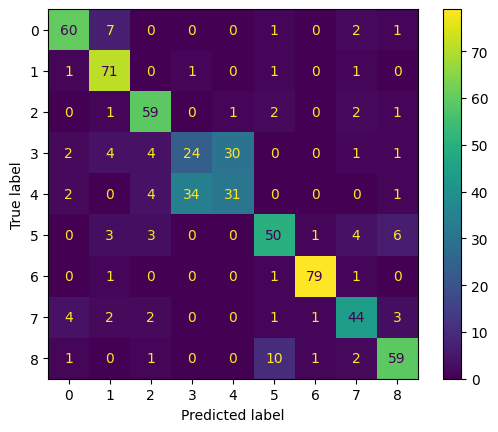

In [53]:
cm = confusion_matrix(y_mc_test, mc_gaussNB_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp.plot()
plt.show()

In [54]:
mc_OneVsOne_clf = OneVsOneClassifier(svm.SVC(kernel='linear',C=10,random_state=42))
mc_OneVsOne_pred = mc_OneVsOne_clf.fit(mc_train_data_feat_LSI, y_mc_train).predict(mc_test_data_feat_LSI)
print("One Vs One SVM Accuracy: ", accuracy_score(y_mc_test, mc_OneVsOne_pred))
print("One Vs One SVM Recall: ", recall_score(y_mc_test, mc_OneVsOne_pred, average = 'weighted'))
print("One Vs One SVM Precision: ", precision_score(y_mc_test, mc_OneVsOne_pred, average = 'weighted'))
print("One Vs One SVM F1-Score: ", f1_score(y_mc_test, mc_OneVsOne_pred, average = 'weighted'))

One Vs One SVM Accuracy:  0.8063492063492064
One Vs One SVM Recall:  0.8063492063492064
One Vs One SVM Precision:  0.8156786101281227
One Vs One SVM F1-Score:  0.8079405098661975


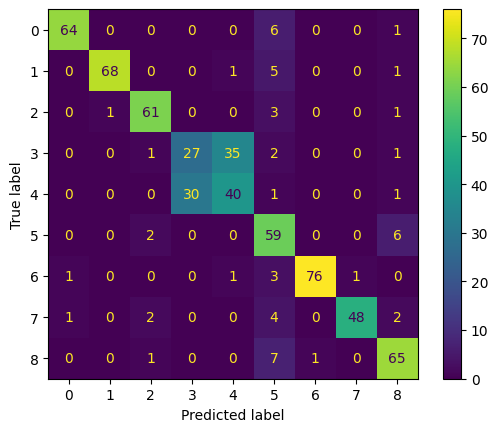

In [55]:
cm = confusion_matrix(y_mc_test, mc_OneVsOne_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp.plot()
plt.show()

In [56]:
mc_OneVsRest_clf = OneVsRestClassifier(svm.SVC(kernel='linear',C=10,random_state=42))
mc_OneVsRest_pred = mc_OneVsRest_clf.fit(mc_train_data_feat_LSI, y_mc_train).predict(mc_test_data_feat_LSI)
print("One Vs Rest SVM Accuracy: ", accuracy_score(y_mc_test, mc_OneVsRest_pred))
print("One Vs Rest SVM Recall: ", recall_score(y_mc_test, mc_OneVsRest_pred, average = 'weighted'))
print("One Vs Rest SVM Precision: ", precision_score(y_mc_test, mc_OneVsRest_pred, average = 'weighted'))
print("One Vs Rest SVM F1-Score: ", f1_score(y_mc_test, mc_OneVsRest_pred, average = 'weighted'))

One Vs Rest SVM Accuracy:  0.8158730158730159
One Vs Rest SVM Recall:  0.8158730158730159
One Vs Rest SVM Precision:  0.8243909896724783
One Vs Rest SVM F1-Score:  0.8191766541037578


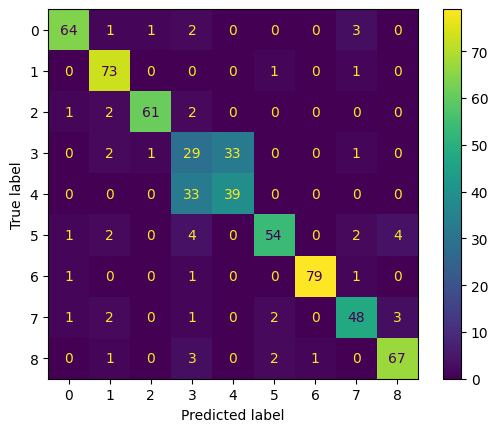

In [57]:
cm = confusion_matrix(y_mc_test, mc_OneVsRest_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
disp.plot()
plt.show()

## Question #10

In [58]:
embeddings_dict = {}
dimension_of_glove = 300
with open('glove/glove.6B.300d.txt', 'r', encoding="utf-8" ) as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embeddings_dict[word] = vector

In [59]:
## Finding the values for values for Queen, King, Wife and Husband
kingqueen_wifehusband =  np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband'])
print(kingqueen_wifehusband)
kingqueen = np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king'])
print(kingqueen)
wifehusband = np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband'])
print(wifehusband)

6.1650367
5.966258
3.1520464


In [60]:
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [64]:
glove2word2vec('./glove/glove.6B.300d.txt','./glove/word2vec')
glove_model = KeyedVectors.load_word2vec_format('./glove/word2vec', binary=False)

In [62]:
king = glove_model.similar_by_word("king")
print("king is similar to {}: {:.4f}".format(*king[0]))
wife = glove_model.similar_by_word("wife")
print("wife is similar to {}: {:.4f}".format(*wife[0]))

king is similar to queen: 0.6336
wife is similar to husband: 0.8646


In [63]:
from scipy import spatial 
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

print(find_closest_embeddings(embeddings_dict["queen"] - embeddings_dict["king"] + embeddings_dict["husband"])[:5])

['husband', 'wife', 'mother', 'daughter', 'grandmother']


## Question #11

In [107]:
def Word_Embedding(model, data):
    rand_vect = model.get_vector('random')
    n = rand_vect.shape[0]
    word_embedding = np.zeros((len(data),n))
    count = 0
    for sentence in data:
        lemmas_vect = sentence.split()
        model_output = []
        for lemma in lemmas_vect:
            try:
                model_output.append(model.get_vector(lemma))
            except KeyError:
                pass

        if len(model_output) > 0:
            model_output = np.array(model_output)
            word_embedding[count] = model_output.mean(accuracy_score)
        
        count += 1
        
            #get_vectors = model.get_vector(word)
            #if len(get_vectors) > 0:
            #    model_output.append(get_vectors)
        #if len(model_output) > 0:
        #    word_embedding[count] = np.array(model_output).mean(axis = 0)
        #count += 1
    
    return word_embedding

In [108]:
def clean_texter(sentence):
    stemmed_sen = []
    stem_list = word_tokenize(sentence)
    for stem in stem_list:
        stemmed_sen.append(clean(stem))  
    return ' '.join(stemmed_sen)

def punc_num_remover(sentence):
    non_lemmatized_sen = []
    lemma_list = word_tokenize(sentence)
    for lemma in lemma_list:
        if (not any(char in lemma for char in punctuation) and not any(char.isdigit() for char in lemma)):
            non_lemmatized_sen.append(lemma.lower())  
    return ' '.join(non_lemmatized_sen)

In [111]:
word_embedding_train = []
word_embedding_test = []

for sentence in train_data['full_text']:
    word_embedding_train.append(clean_texter(sentence))

for sentence in test_data['full_text']:
    word_embedding_test.append(clean_texter(sentence))

In [112]:
word_embedding_train = Word_Embedding(glove_model, word_embedding_train)

KeyError: "word ''As' not in vocabulary"